Гапеева Олеся Радиковна. 2 вариант, ИУ5-61Б РК1

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

Загрузка данных

Преобразование наборов данных Scikit-learn в Pandas Dataframe

In [8]:
def make_dataframe(ds_function):
    ds = ds_function()
    df = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
                     columns= list(ds['feature_names']) + ['target'])
    return df
    
data = make_dataframe(load_wine)

In [9]:
#первые 5 строк датасета

data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [10]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

alcohol - 0
malic_acid - 0
ash - 0
alcalinity_of_ash - 0
magnesium - 0
total_phenols - 0
flavanoids - 0
nonflavanoid_phenols - 0
proanthocyanins - 0
color_intensity - 0
hue - 0
od280/od315_of_diluted_wines - 0
proline - 0
target - 0


<Axes: >

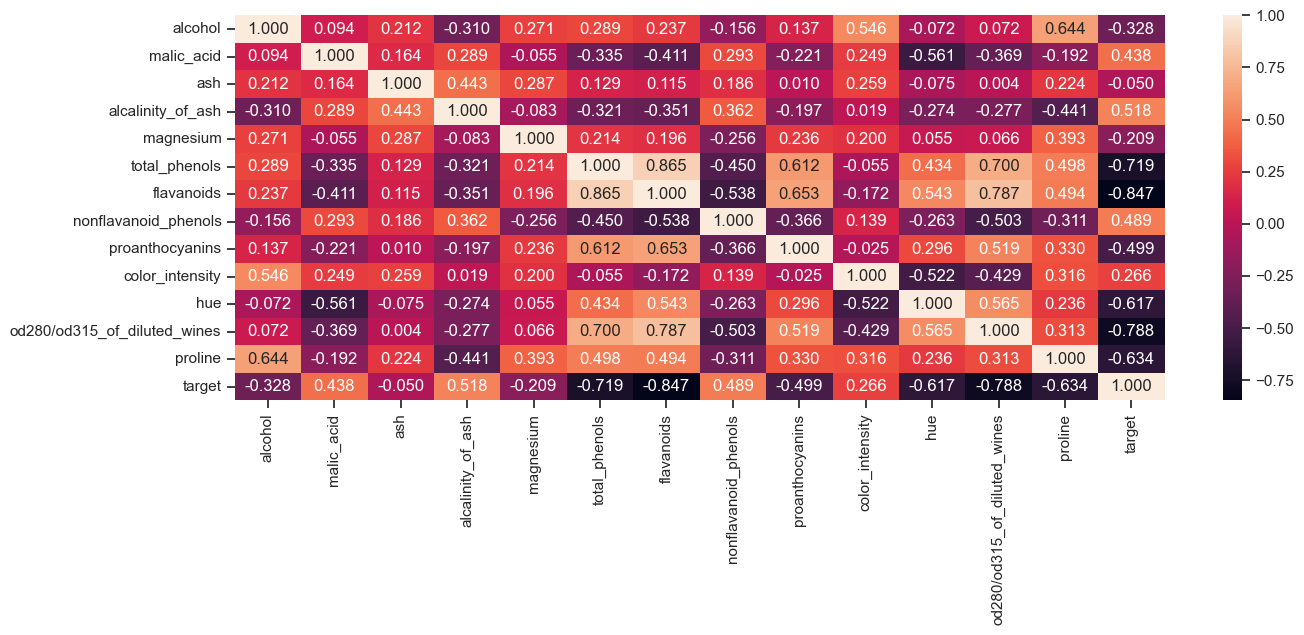

In [11]:
# Вывод значений в ячейках
fig, ax = plt.subplots(figsize=(15, 5))

#create heatmap

sns.heatmap(data.corr(), annot=True, fmt='.3f')

total_phenols, flavanoids,  od280/od315_of_diluted_wines,  имеют высокие отрицательные корреляции с целевой переменной. Это может означать, что эти признаки могут быть полезны для построения модели машинного обучения.

alcohol, ash, color_intensity и magnesium имеют низкие корреляции с целевой переменной. Это может означать, что эти признаки могут быть менее полезны для построения модели, хотя они могут быть важны для других аспектов анализа.

Некоторые признаки имеют высокую корреляцию между собой, что может указывать на избыточность признаков. Например, total_phenols и flavanoids, od280/od315_of_diluted_wines и  total_phenols, od280/od315_of_diluted_wines и  flavanoids имеют высокую положительную корреляцию, что может означать, что они могут быть избыточными и одной из них может быть достаточно для модели.



Диаграмма рассеяния
Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости.

<Axes: xlabel='total_phenols', ylabel='flavanoids'>

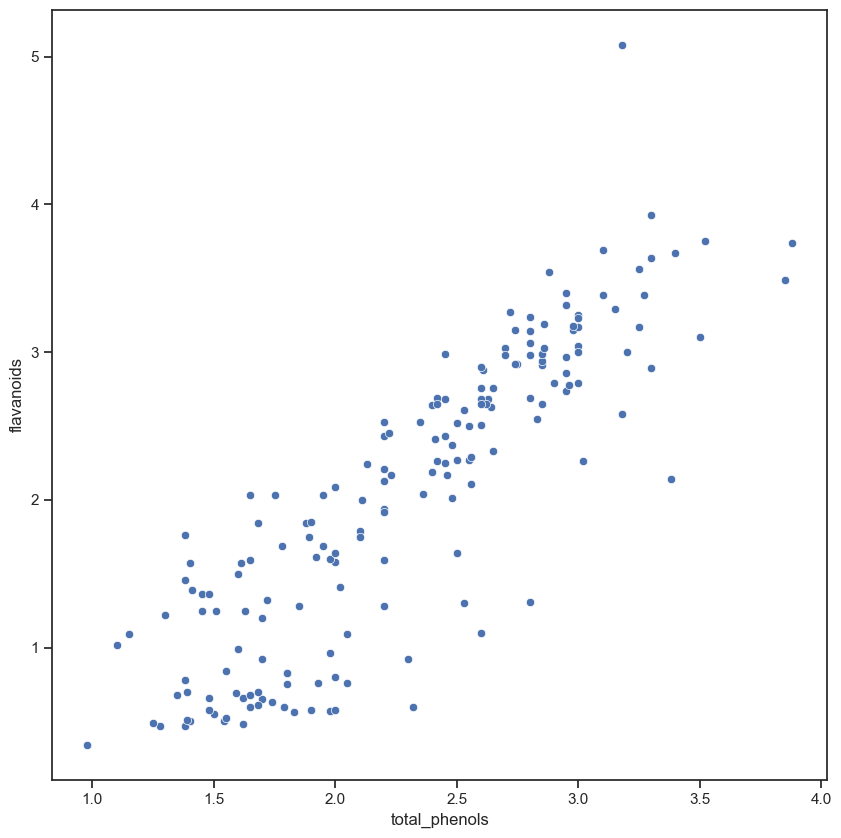

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='total_phenols', y='flavanoids', data=data)

Можно видеть что между полями flavanoids и total_phenols пристутствует почти линейная зависимость.